<a href="https://colab.research.google.com/github/Masakinka/Python/blob/main/2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



**РОЗВʼЯЗОК**

Промпт, який згенерував файл в потрібній структурі:

```
Refactor the following code and do the following

1. split into functions with single reponsibility: does only one action
2. add docstrings and typings to functions
3. add a function which will be called instead of the process_data() in other places
4. add function for processing the new data
```

Файл, який був на вході.

```from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

def process_data(raw_df):
  train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

  input_cols = list(train_df.columns)[1:-1]
  input_cols.remove('Surname')
  target_col = 'Exited'
  train_inputs, train_targets = train_df[input_cols], train_df[target_col]
  val_inputs, val_targets = val_df[input_cols], val_df[target_col]

  numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
  categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

  # Min max scaling
  scaler = MinMaxScaler()
  train_inputs[numeric_cols] = scaler.fit_transform(train_inputs[numeric_cols])
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

  # One hot encoding
  encoder = LabelEncoder()
  encoder.fit(train_inputs[categorical_cols])
  train_inputs[categorical_cols] = encoder.transform(train_inputs[categorical_cols])
  val_inputs[categorical_cols] = encoder.transform(val_inputs[categorical_cols])

  X_train = train_inputs[numeric_cols + encoded_cols]
  X_val = val_inputs[numeric_cols + encoded_cols]
  return X_train, train_targets, X_val, val_targets
  
```

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

from process_bank_churn import preprocess_data

In [ ]:
raw_df = pd.read_csv('train.csv')
X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(raw_df, scale_numeric=False)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3365,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
12236,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix

def get_auroc(model, inputs, targets):
    preds = model.predict_proba(inputs)[:, 1]
    fpr, tpr, _ = roc_curve(targets, preds)
    return auc(fpr, tpr)


def get_metrics(model, inputs, targets, name='', print_f1=False, plot_matrix=False):
    preds = model.predict(inputs)

    if print_f1:
      print(f"F1-score: {f1_score(targets, preds):.2f}")

    roc_auc = get_auroc(model, inputs, targets)
    print(f"ROC AUC: {roc_auc:.2f}")

    if plot_matrix:
      cf = confusion_matrix(targets, preds, normalize='true')
      plt.figure()
      sns.heatmap(cf, annot=True)
      plt.xlabel('Prediction')
      plt.ylabel('Target')
      plt.title('{} Confusion Matrix'.format(name));

ROC AUC: 1.00


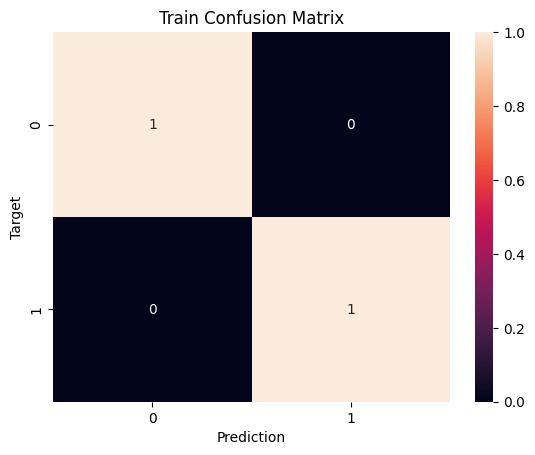

In [ ]:
get_metrics(model, X_train, train_targets, 'Train', plot_matrix=True)

ROC AUC: 0.77


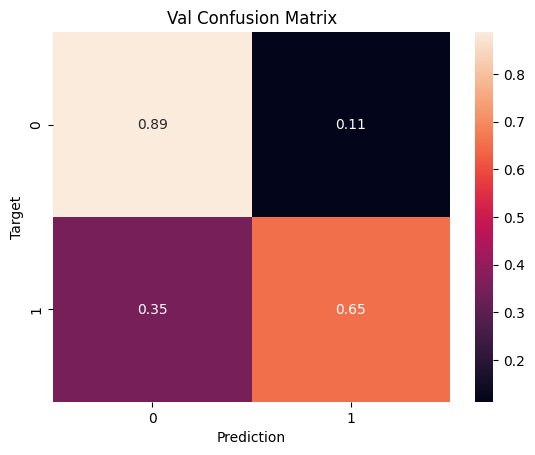

In [ ]:
get_metrics(model, X_val, val_targets, 'Val', plot_matrix=True)

Можемо ще глянути на точність просто з цікавості.

In [ ]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(1.0, 0.8396666666666667)

Модель перенавчена, бо бачимо, що на тренувальних даних точніть 100%, а на валідаційних - менше. Порівняємо з точністю моделі, яка б завжди передбачала "Ні".

In [ ]:
val_targets.value_counts() / len(val_targets)

Exited
0.0    0.796667
1.0    0.203333
Name: count, dtype: float64

Наша модель краще на 5%, але можливо можна ще краще.

In [ ]:
model.get_depth()

26

Візуалізуємо дерево

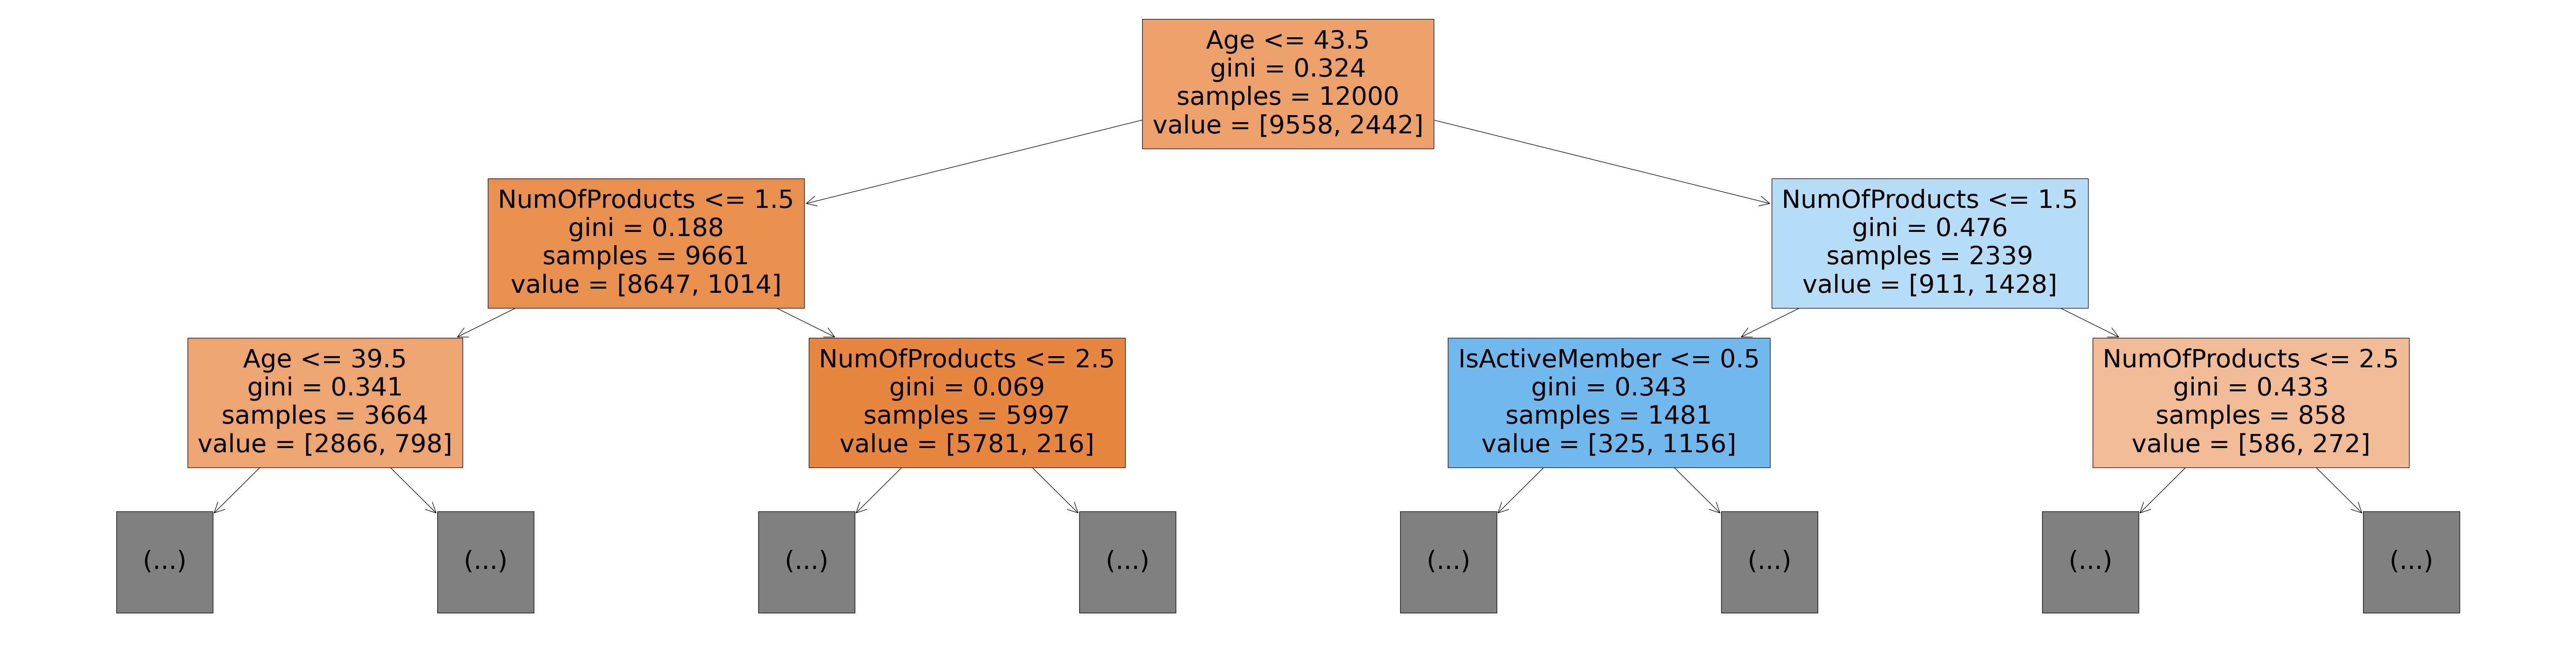

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

З графу видно, що найвпливовіші ознаки - Age, NumOfProducts, IsActiveMember.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

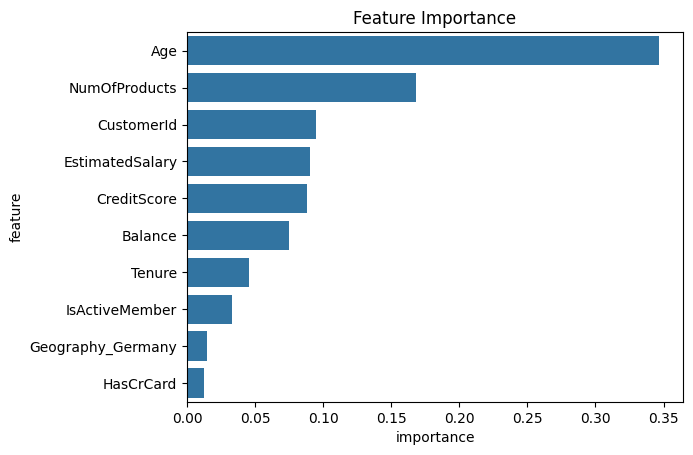

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

In [ ]:
get_metrics(model, X_train, train_targets, 'Train')

ROC AUC: 0.92


In [ ]:
get_metrics(model, X_val, val_targets, 'Val')

ROC AUC: 0.92


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [ ]:
def max_depth_auroc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_auroc = get_auroc(model, X_train, train_targets)
    val_auroc = get_auroc(model, X_val, val_targets)
    return {'Max Depth': md, 'Training AUROC': train_auroc, 'Validation AUROC': val_auroc}

In [ ]:
%%time
aurocs_df = pd.DataFrame([max_depth_auroc(md) for md in range(1, 21)])

CPU times: user 1.93 s, sys: 7.49 ms, total: 1.94 s
Wall time: 7.13 s


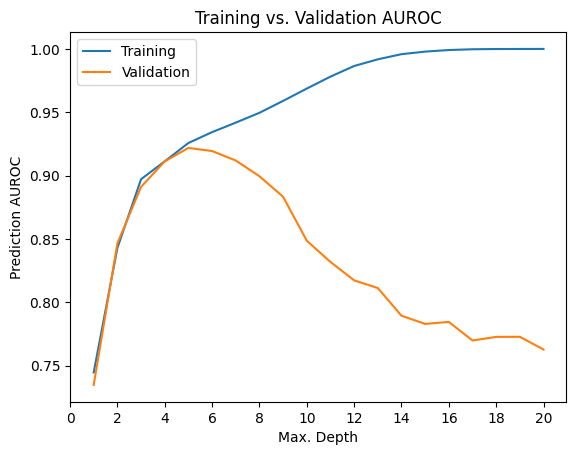

In [ ]:
plt.figure()
plt.plot(aurocs_df['Max Depth'], aurocs_df['Training AUROC'])
plt.plot(aurocs_df['Max Depth'], aurocs_df['Validation AUROC'])
plt.title('Training vs. Validation AUROC')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction AUROC')
plt.legend(['Training', 'Validation']);

In [ ]:
aurocs_df.loc[aurocs_df['Validation AUROC'].argmax()]

Max Depth           5.000000
Training AUROC      0.925766
Validation AUROC    0.921864
Name: 4, dtype: float64

Оптимальна глибина з точки зору якості моделі (найвища Validation Error) - 5.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from process_bank_churn import preprocess_new_data

In [ ]:
test_raw_df = pd.read_csv('test.csv')

In [ ]:
preprocessed_test = preprocess_new_data(test_raw_df, input_cols, scaler, encoder, scale_numeric=False)

In [ ]:
preprocessed_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
3,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
4,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0


In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [ ]:
proba_predictions = model.predict_proba(preprocessed_test)[:, 1]

In [ ]:
submission['Exited'] = proba_predictions

In [ ]:
submission['Exited'].head()

0    0.237911
1    0.027613
2    0.027613
3    0.770925
4    0.027613
Name: Exited, dtype: float64

In [ ]:
submission.to_csv('submission_decision_tree.csv', index=False)

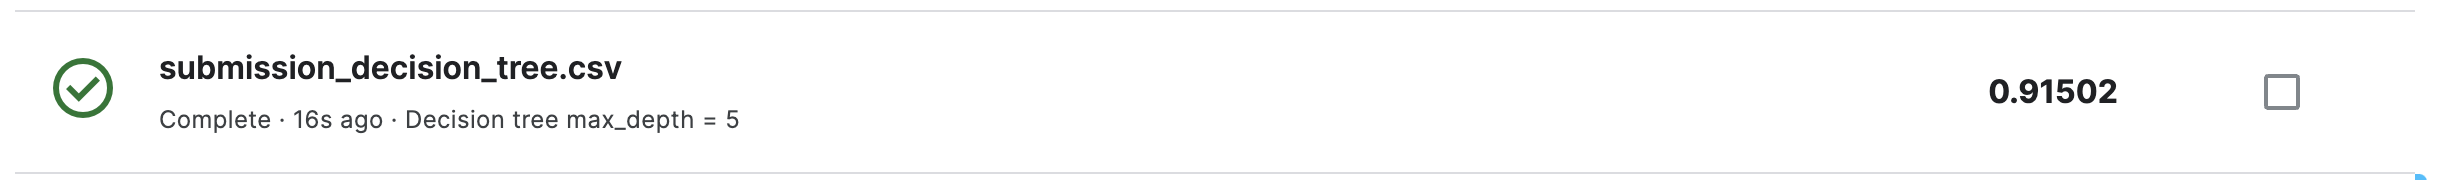